<a href="https://colab.research.google.com/github/minghung0527/bigdata/blob/master/1022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(SportsAnalytics)
library(ggplot2)

In [7]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")

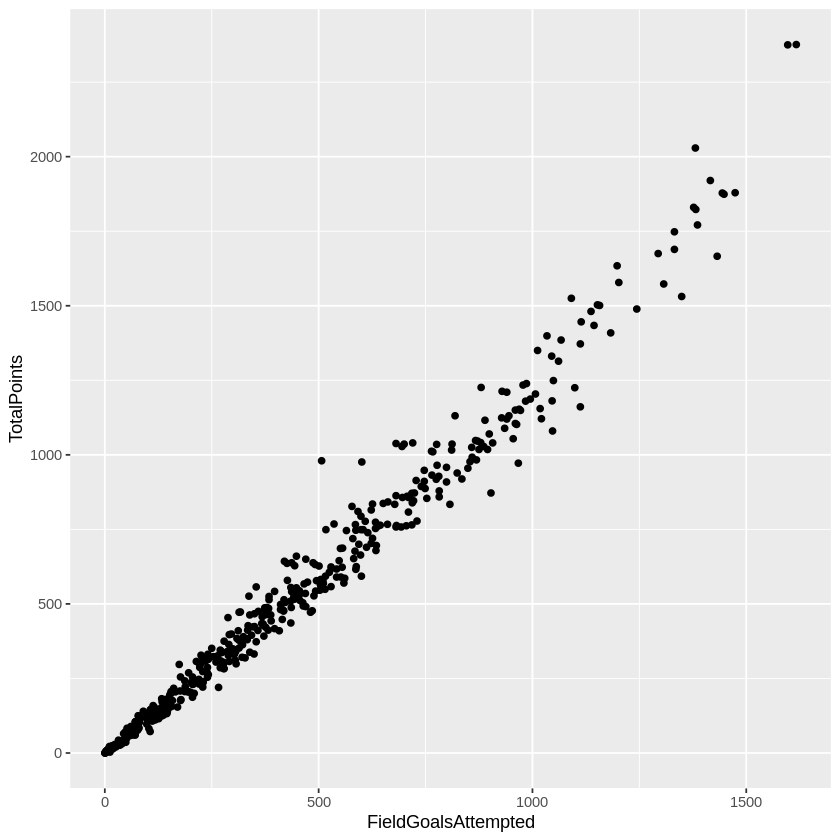

In [8]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516)

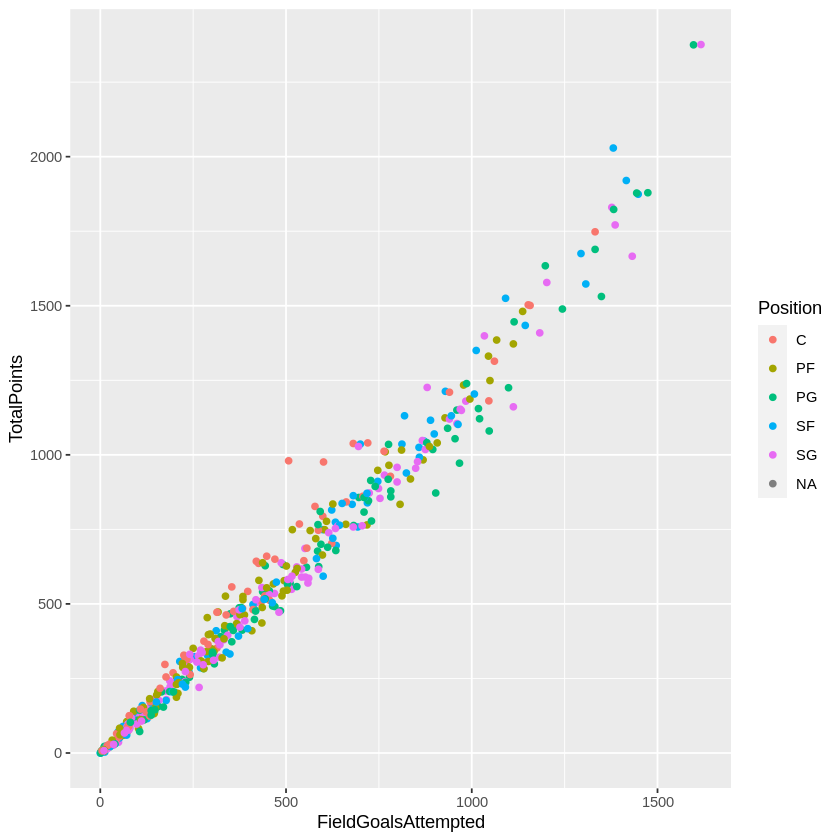

In [9]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, color = Position)

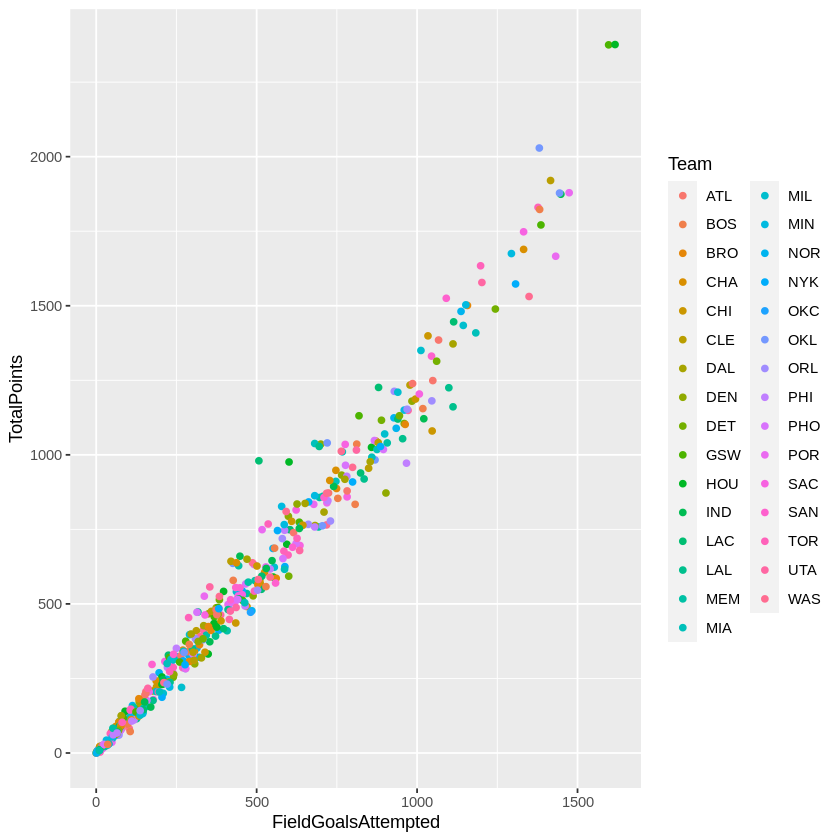

In [16]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, color = Team)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



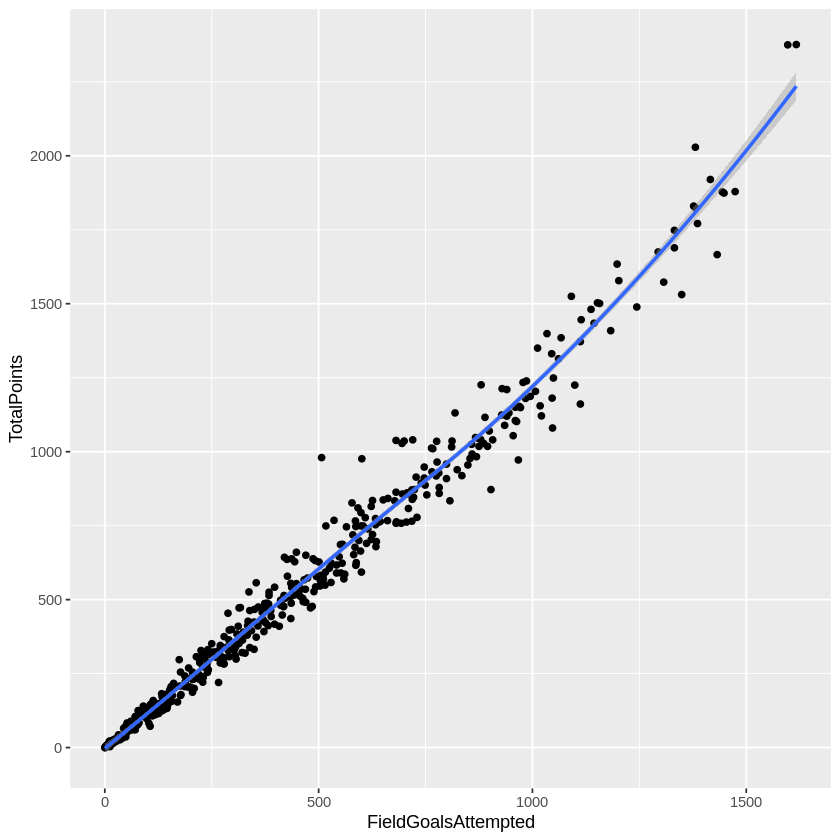

In [18]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, geom = c("point", "smooth"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



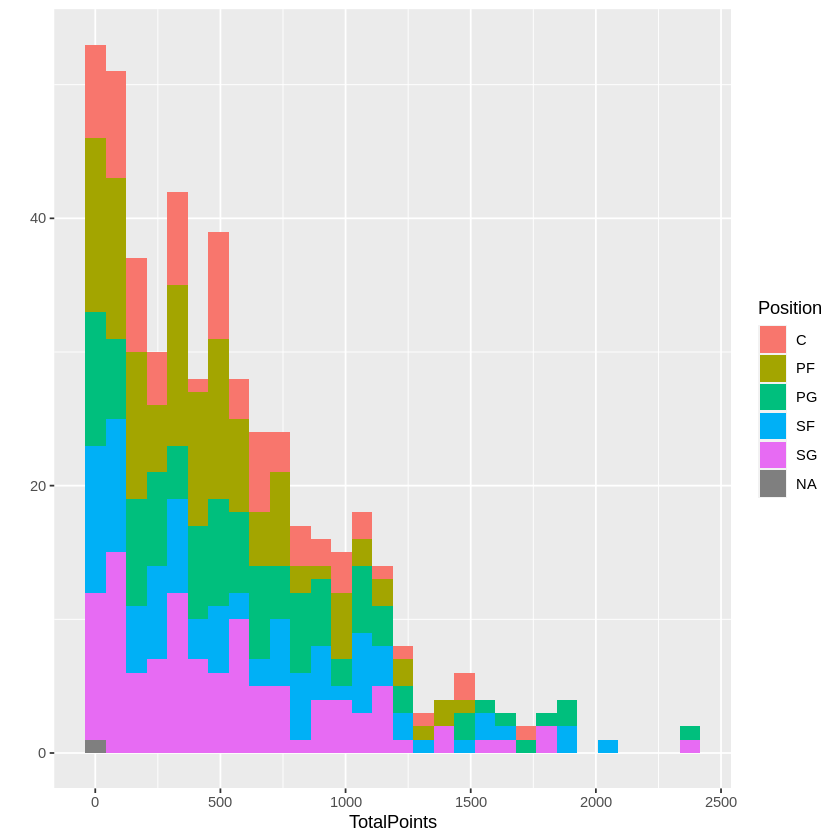

In [11]:
qplot(TotalPoints, data = NBA1516, fill = Position)

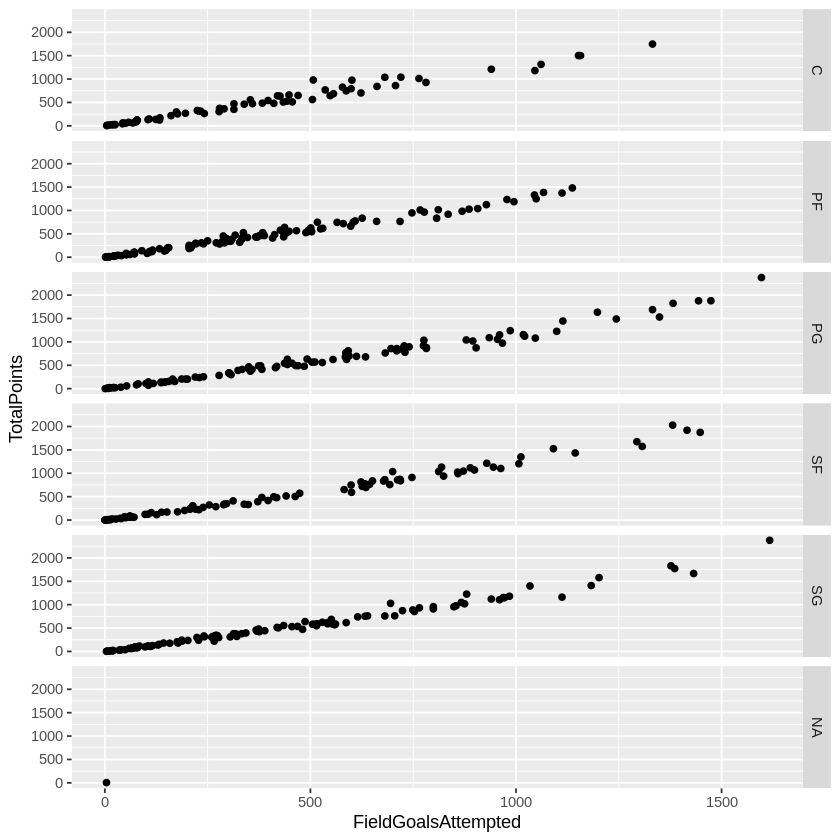

In [14]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = Position ~ .)

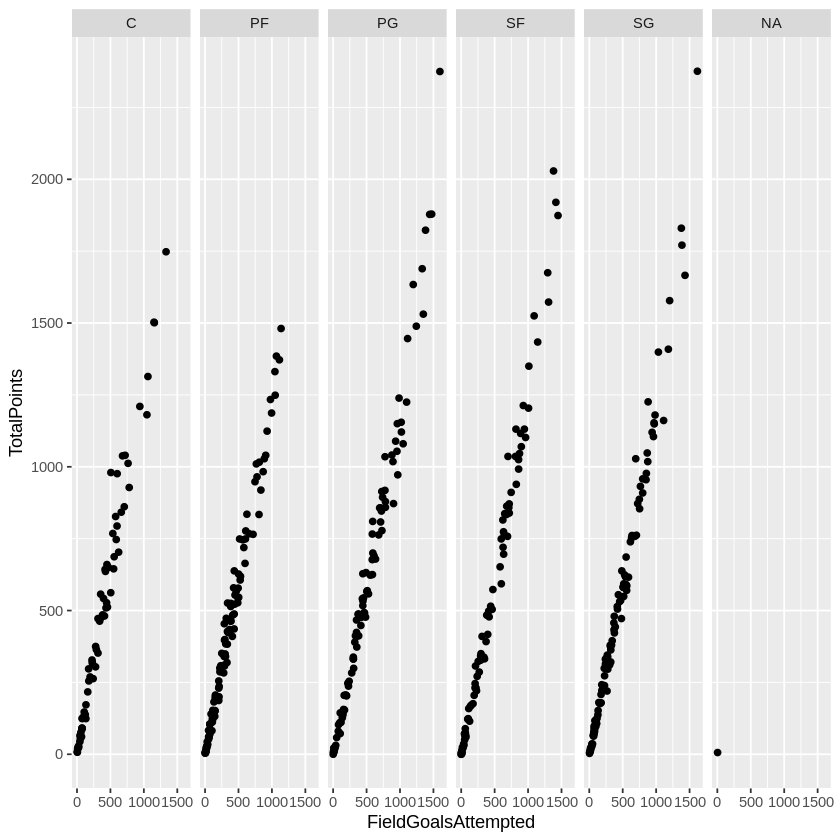

In [15]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = . ~ Position)

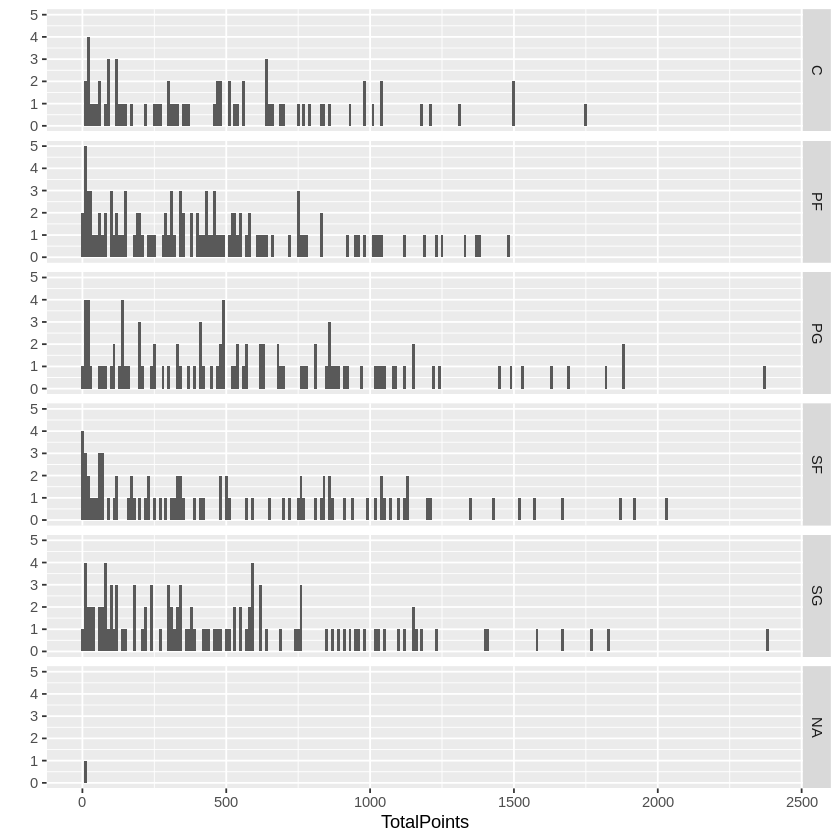

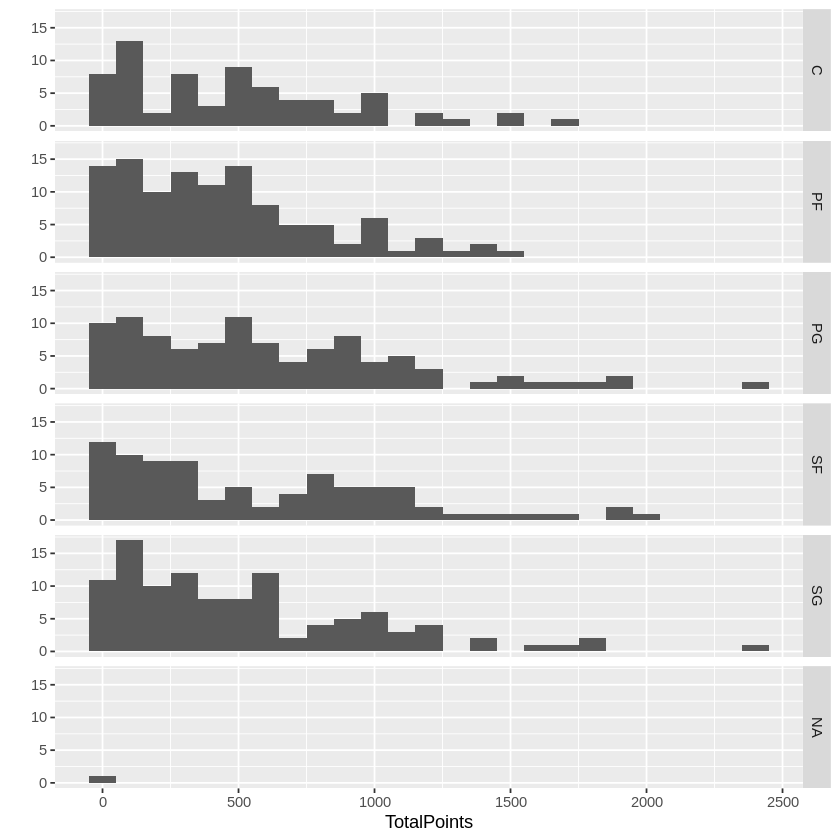

In [22]:
qplot(TotalPoints, data = NBA1516, facets = Position ~ ., binwidth = 10)
qplot(TotalPoints, data = NBA1516, facets = Position ~ ., binwidth = 100)

In [23]:
df <- data.frame(gp = factor(rep(letters[1:3], each = 10)), y = rnorm(30))

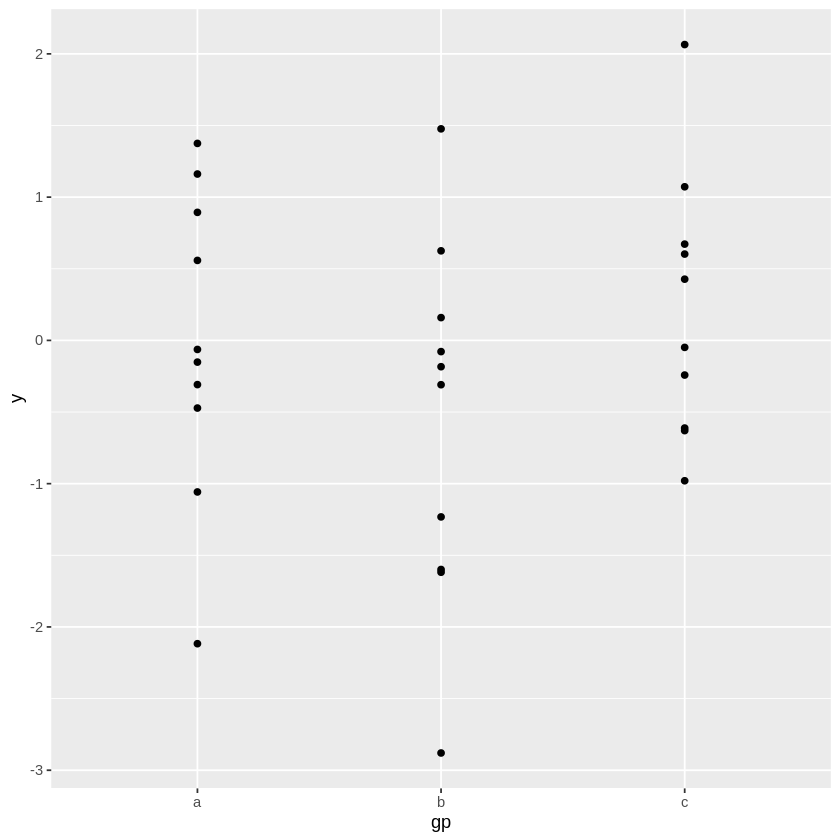

In [24]:
ggplot(df, aes(x = gp, y = y)) + geom_point()

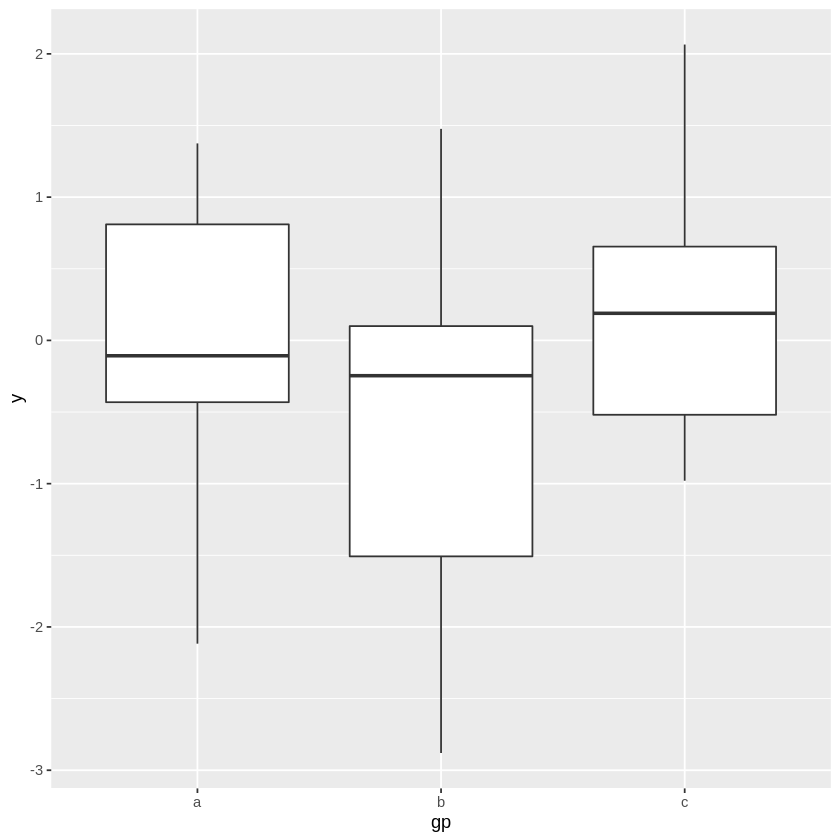

In [25]:
ggplot(df, aes(x = gp, y = y)) + geom_boxplot()

In [26]:
df$z <- df$y + rnorm(30)

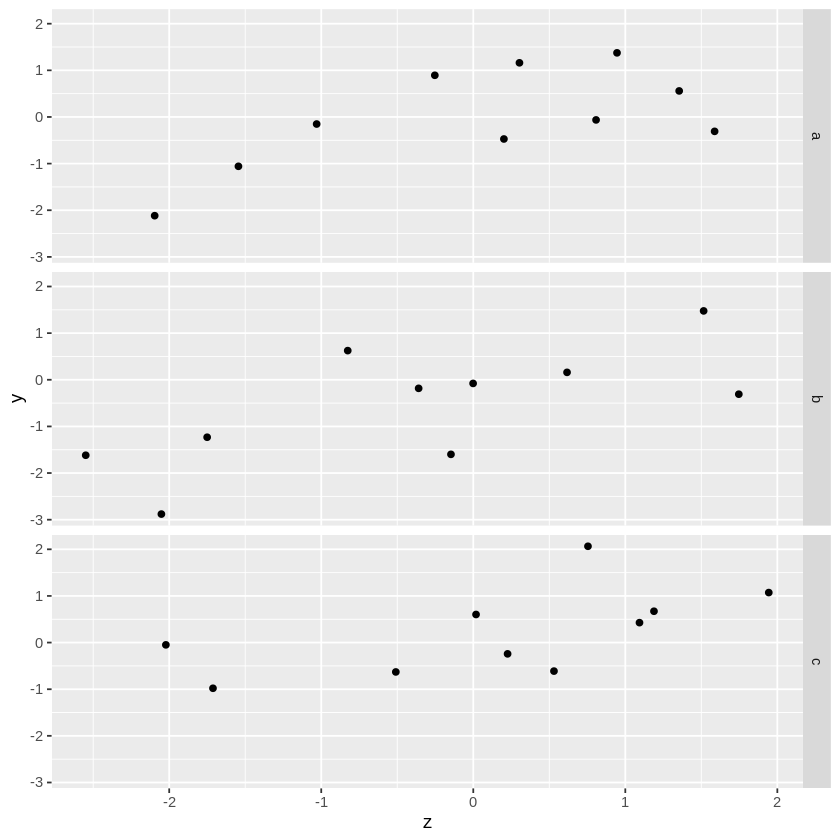

In [28]:
ggplot(df, aes(x = z, y = y)) + geom_point() + facet_grid(gp ~ .)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



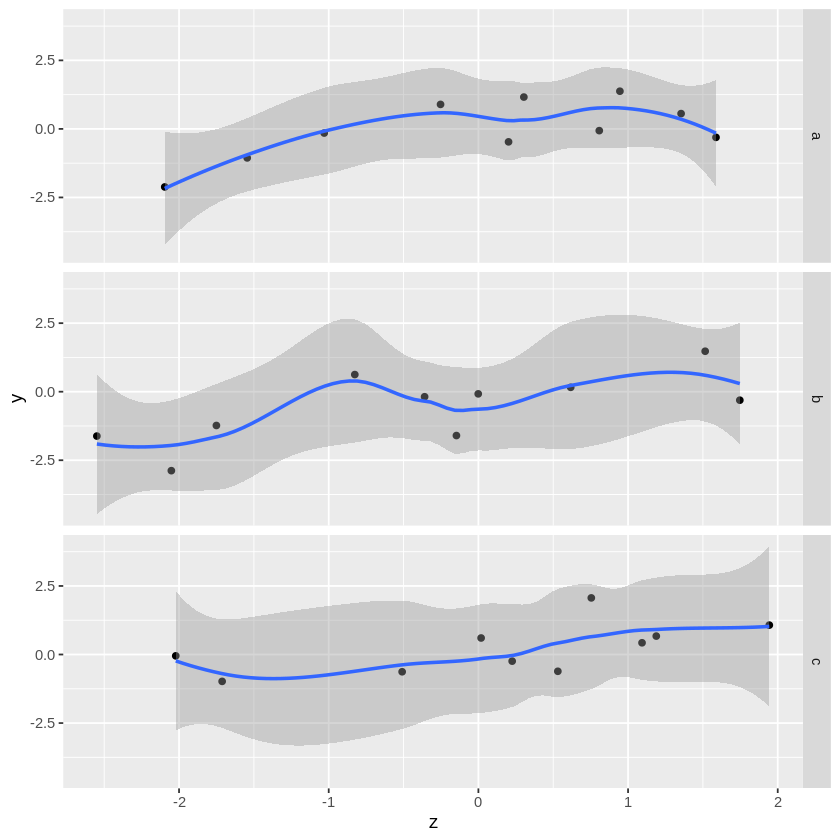

In [30]:
ggplot(df, aes(x = z, y = y)) + geom_point() + facet_grid(gp ~ .) + geom_smooth()

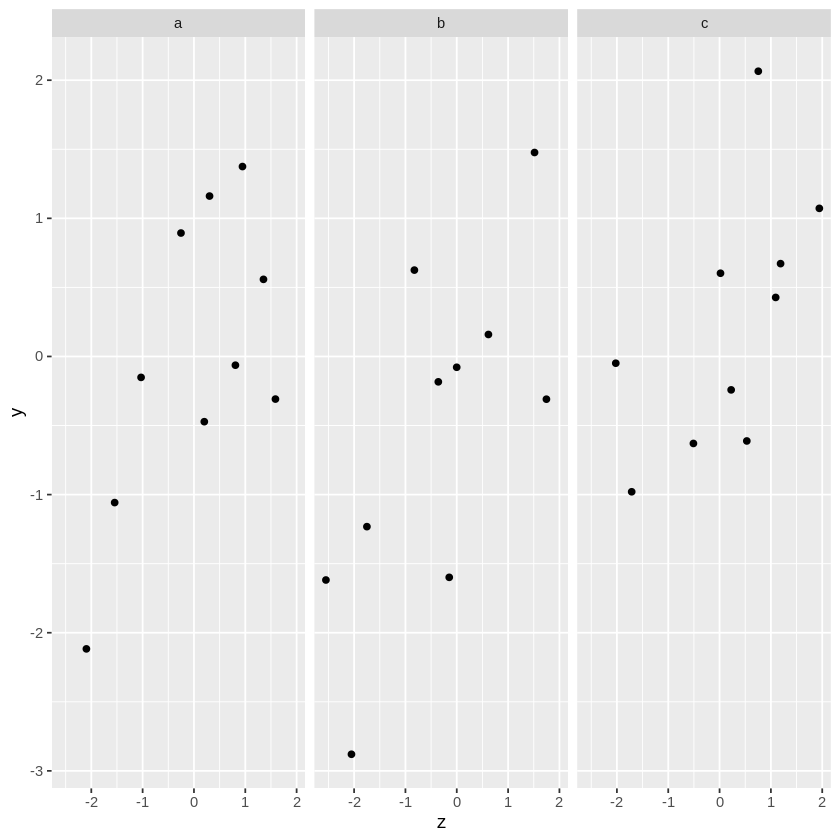

In [29]:
ggplot(df, aes(x = z, y = y)) + geom_point() + facet_grid(. ~ gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



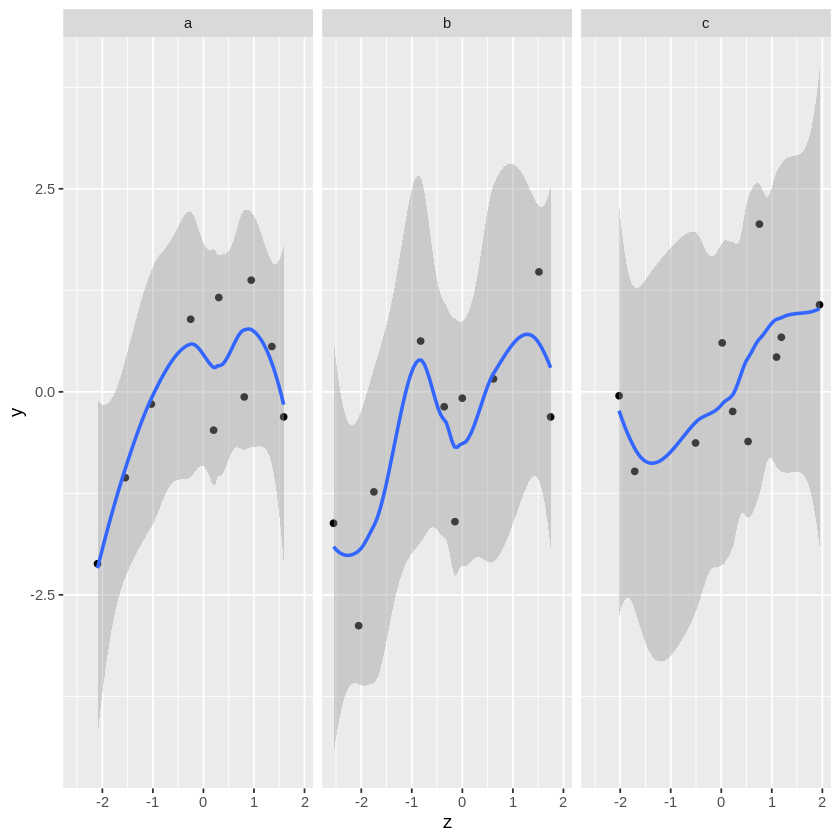

In [31]:
ggplot(df, aes(x = z, y = y)) + geom_point() + facet_grid(. ~ gp) + geom_smooth()

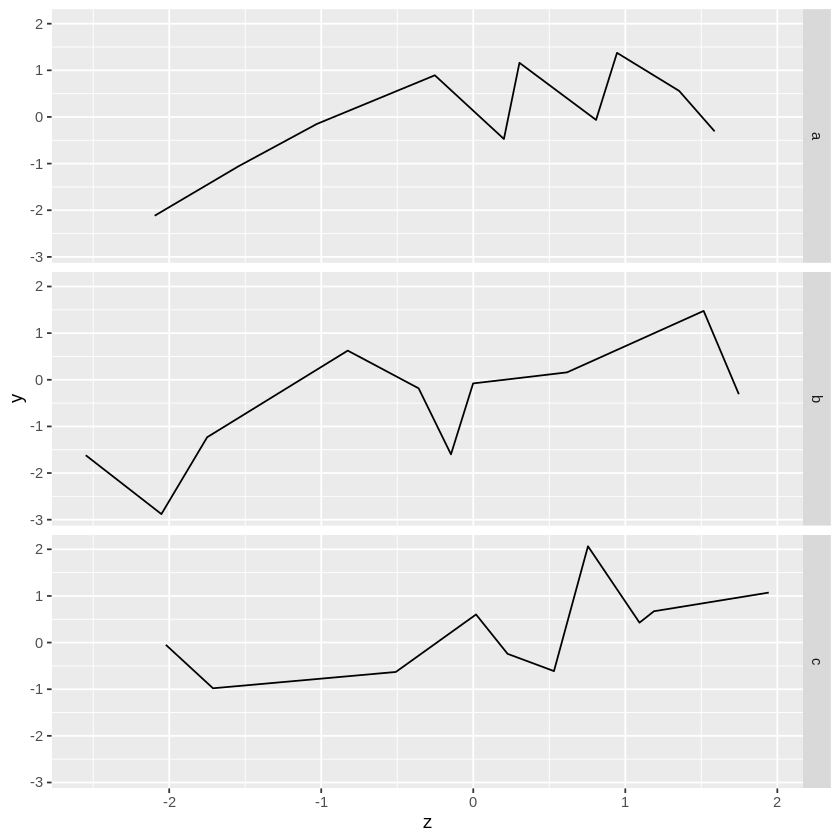

In [32]:
ggplot(df, aes(x = z, y = y)) + geom_line() + facet_grid(gp ~ .)

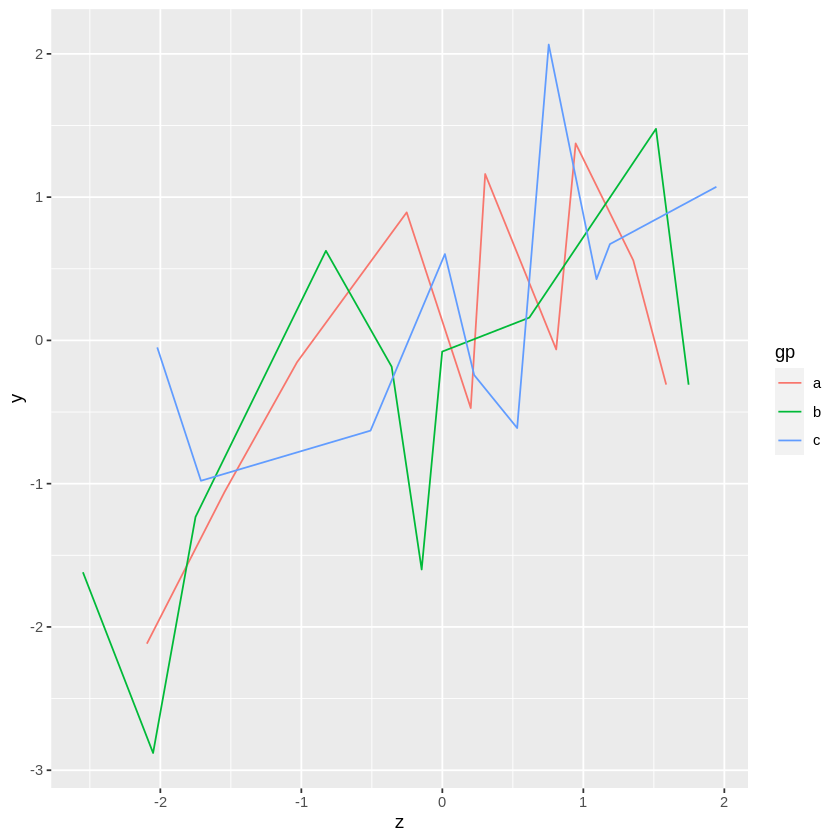

In [33]:
ggplot(df, aes(x = z, y = y, color = gp)) + geom_line()

In [39]:
install.packages("datasets")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [44]:
library(datasets)
library(data.table)

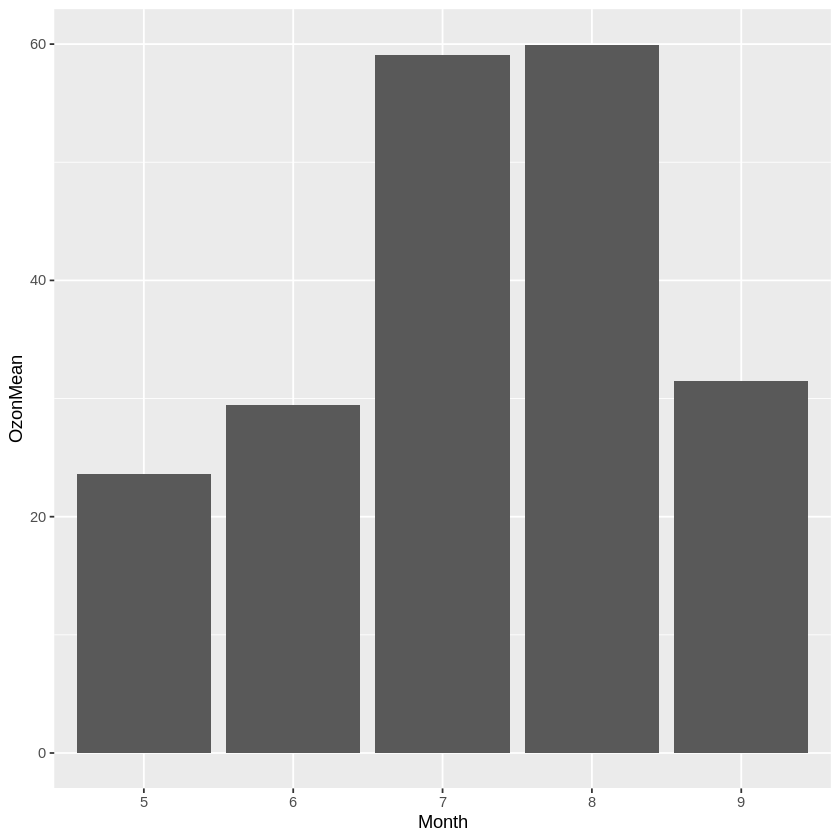

In [45]:
airquality$Month <- as.factor(airquality$Month)
airquality.mean <- data.table(airquality)[,.(OzonMean = mean(Ozone, na.rm = T)), by = Month]
ggplot() + geom_bar(data = airquality.mean, aes(x = Month, y = OzonMean), stat = "identity")

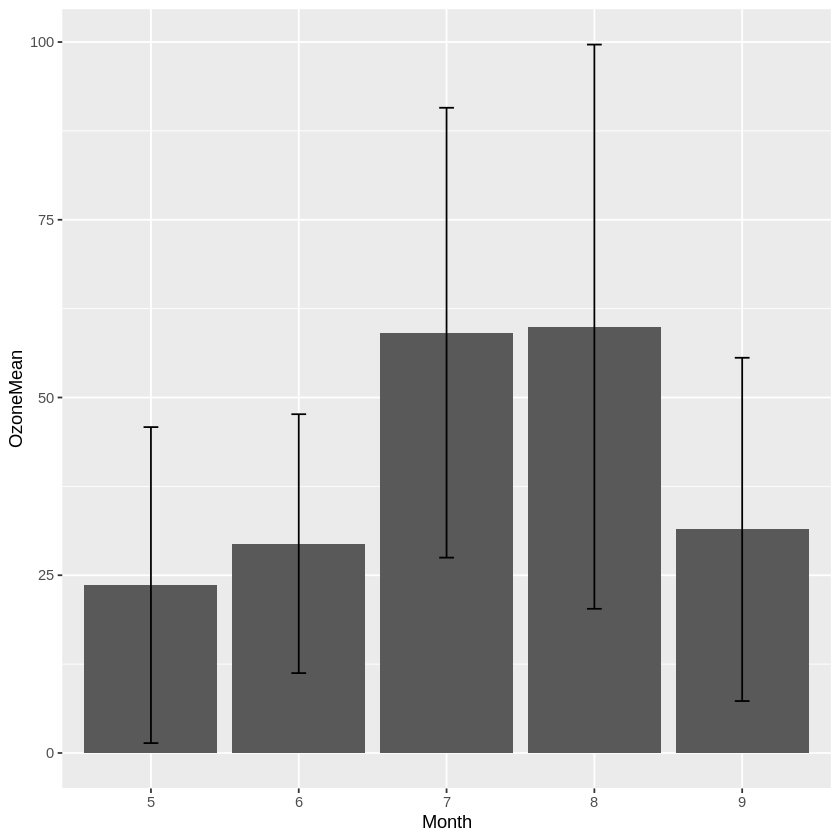

In [47]:
airquality$Month <- as.factor(airquality$Month)
airquality.stat <- data.table(airquality)[,.(OzoneMean = mean(Ozone, na.rm = T), OzoneSD = sd(Ozone, na.rm = T)), by = Month]
ggplot(data = airquality.stat) + 
geom_bar(aes(x = Month, y = OzoneMean), stat = "identity") + 
geom_errorbar(aes(x = Month, ymin = OzoneMean - OzoneSD, ymax = OzoneMean + OzoneSD), width = .1)